In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from helper_files.plotting_functions import get_opponent_df, generate_fv_grid, plot_heatmap, generate_cp_grid
from helper_files.etv_model import ETVModel

/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is

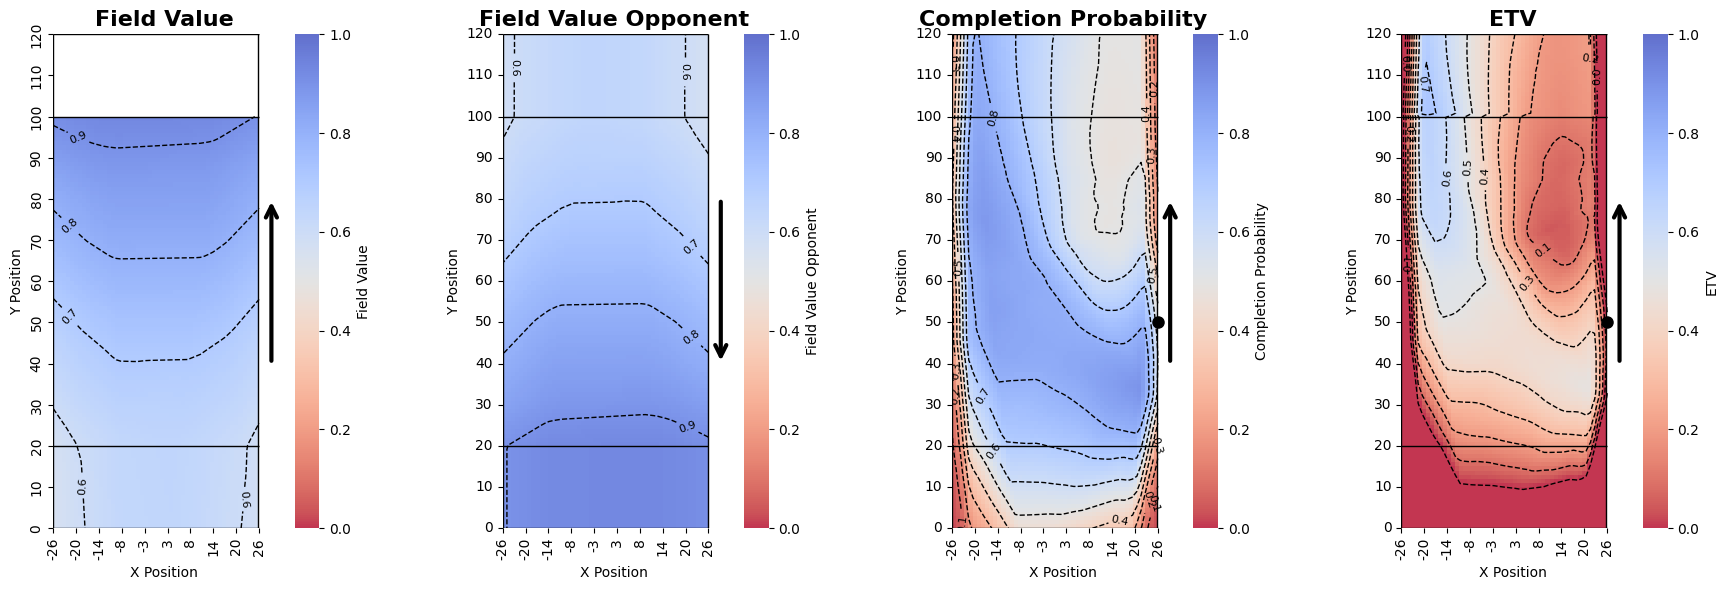

In [11]:
models = joblib.load('../data/models/mlp_models_mlp.jblb')
defaults = {'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':11}
sigma = 0
thrower_x, thrower_y = 50, 50
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])
etv_model = ETVModel(models['cp_model'], models['fv_model'])
etv = etv_model.predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()


/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneb

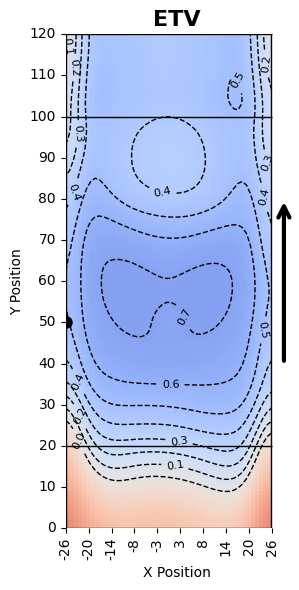

In [24]:
# Load models
models = joblib.load('../data/models/mlp_models_mlp.jblb')
defaults = {'game_quarter': 1, 'quarter_point': 1, 'score_diff': 0, 'times': 11}
sigma = 3
thrower_y = 50

# Set up figure and axes
fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Update function for animation
def update(thrower_x):
    axes.clear()  # Clear previous plots
        
    cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]

    # ETV Calculation and plot
    etv_model = ETVModel(models['cp_model'], models['fv_model'])
    etv = etv_model.predict(cp_grid).reshape(120, 50)
    plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes, highlight_point=(thrower_x, thrower_y))

    plt.tight_layout()

# Create animation
thrower_x_vals = np.arange(0, 50, 1)  # Values of thrower_x for each frame
ani = FuncAnimation(fig, update, frames=thrower_x_vals, repeat=True)

# Show animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

output_path = os.path.expanduser('~/Downloads/etv_lateral.gif')  # Expands ~ to full path
ani.save(output_path, writer='pillow')



/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneb

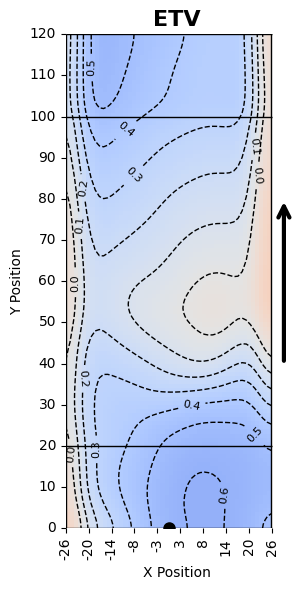

In [25]:
# Load models
models = joblib.load('../data/models/mlp_models_mlp.jblb')
defaults = {'game_quarter': 1, 'quarter_point': 1, 'score_diff': 0, 'times': 11}
sigma = 3
thrower_x = 25

# Set up figure and axes
fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Update function for animation
def update(thrower_y):
    axes.clear()  # Clear previous plots
        
    cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]

    # ETV Calculation and plot
    etv_model = ETVModel(models['cp_model'], models['fv_model'])
    etv = etv_model.predict(cp_grid).reshape(120, 50)
    plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes, highlight_point=(thrower_x, thrower_y))

    plt.tight_layout()

# Create animation
thrower_y_vals = np.arange(0, 100, 1)  # Values of thrower_x for each frame
ani = FuncAnimation(fig, update, frames=thrower_y_vals, repeat=True)

# Show animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

output_path = os.path.expanduser('~/Downloads/etv_forward.gif')  # Expands ~ to full path
ani.save(output_path, writer='pillow')



/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/bradeneb

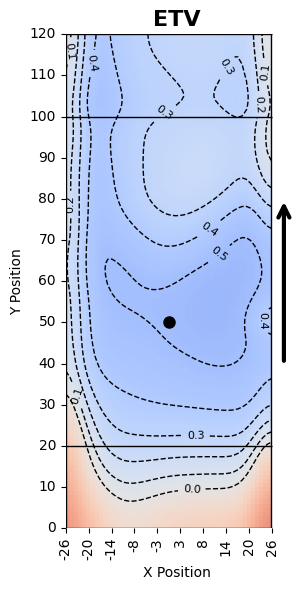

In [37]:
# Load models
models = joblib.load('../data/models/mlp_models_mlp.jblb')
defaults = {'game_quarter': 1, 'quarter_point': 1, 'score_diff': 0, 'times': 11}
sigma = 3
thrower_x = 25
thrower_y = 50

# Set up figure and axes
fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Update function for animation
def update(times):
    axes.clear()  # Clear previous plots
    defaults = {'game_quarter': 1, 'quarter_point': 1, 'score_diff': 0, 'times': times}
    cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]

    # ETV Calculation and plot
    etv_model = ETVModel(models['cp_model'], models['fv_model'])
    etv = etv_model.predict(cp_grid).reshape(120, 50)
    plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes, highlight_point=(thrower_x, thrower_y))

    plt.tight_layout()

# Create animation
times = np.arange(0, 0.75, .05)[::-1]  # Values of thrower_x for each frame
ani = FuncAnimation(fig, update, frames=times, repeat=True)

# Show animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

output_path = os.path.expanduser('~/Downloads/etv_time.gif')  # Expands ~ to full path
ani.save(output_path, writer='pillow')



In [36]:
times[::-1]

array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

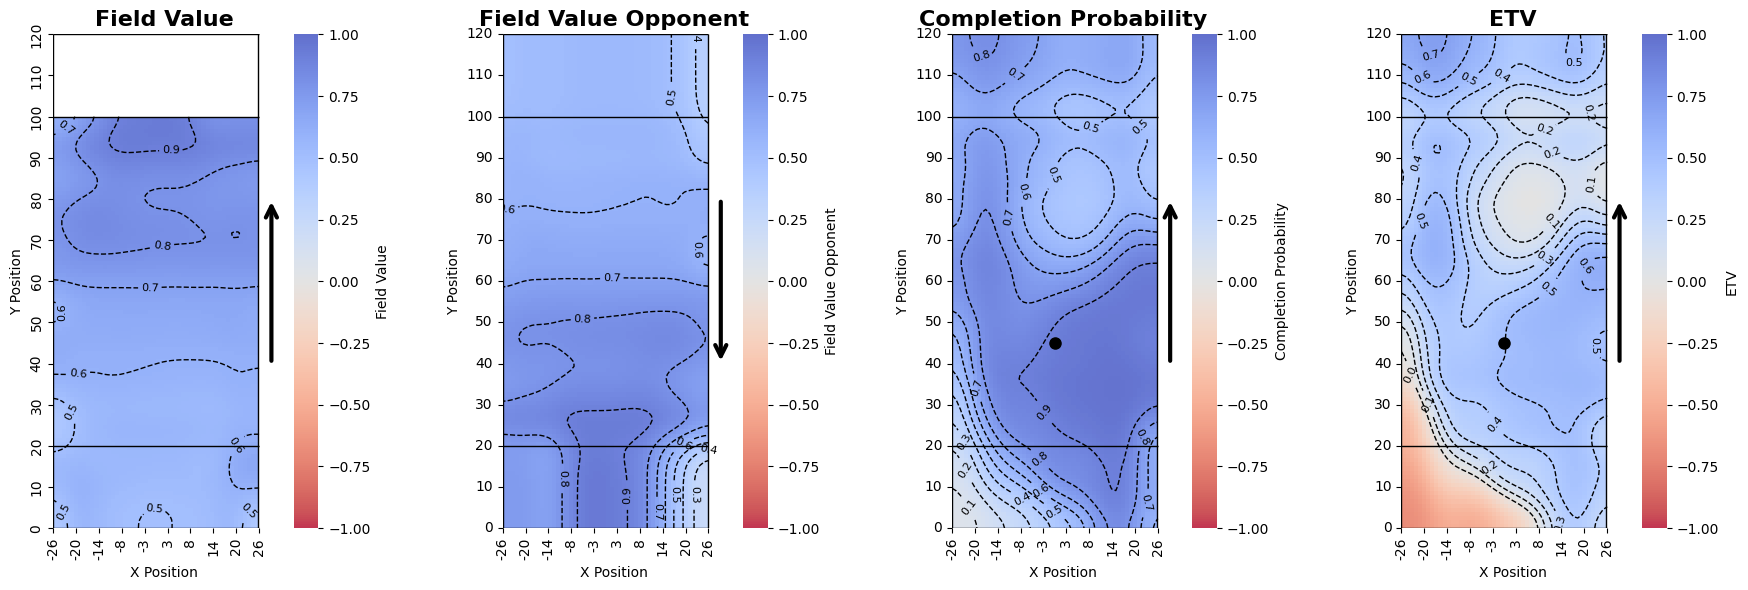

In [3]:
models = joblib.load('../data/models/xgb_models_auc.jblb')
defaults = {'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':11}
sigma = 4
thrower_x, thrower_y = 25, 45
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])
etv_model = ETVModel(models['cp_model'], models['fv_model'])
etv = etv_model.predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()


/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

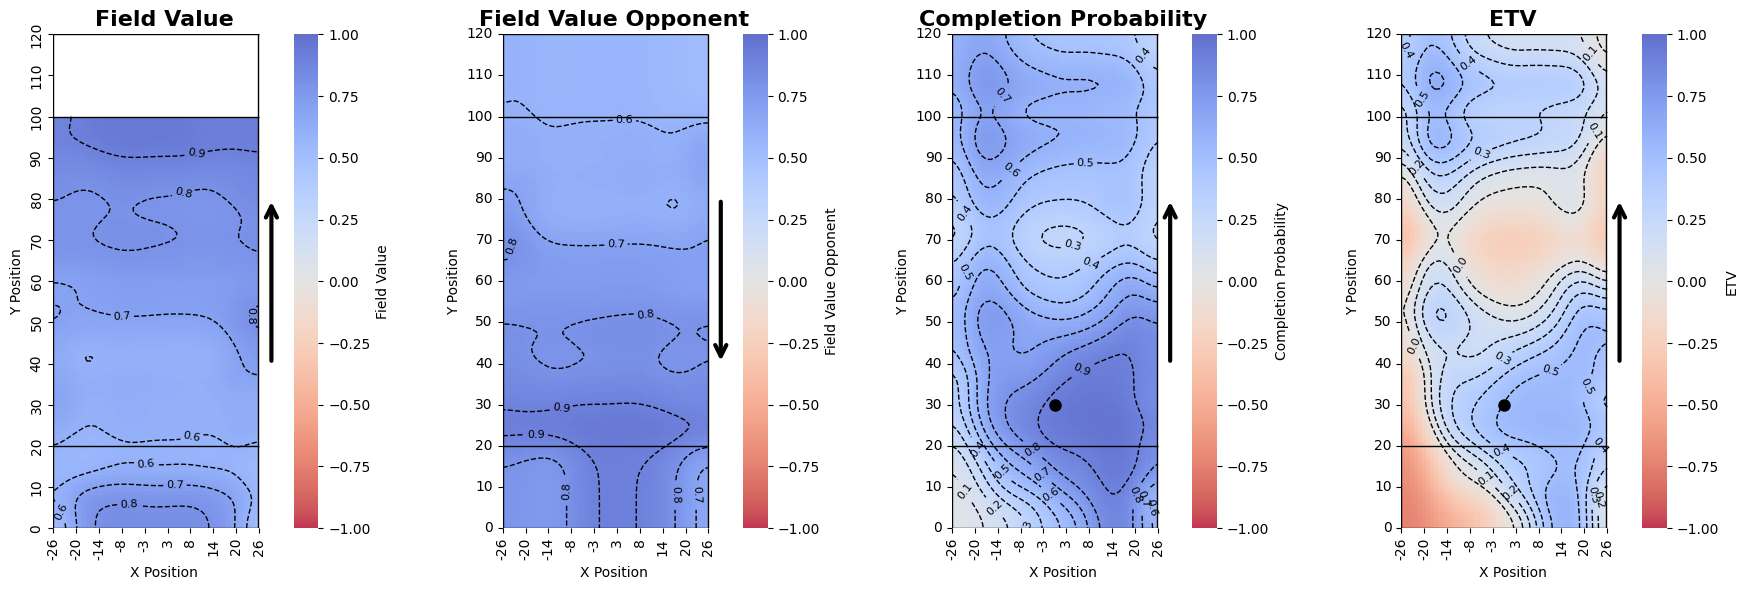

In [4]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':10}
sigma = 4
thrower_x, thrower_y = 25, 30
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

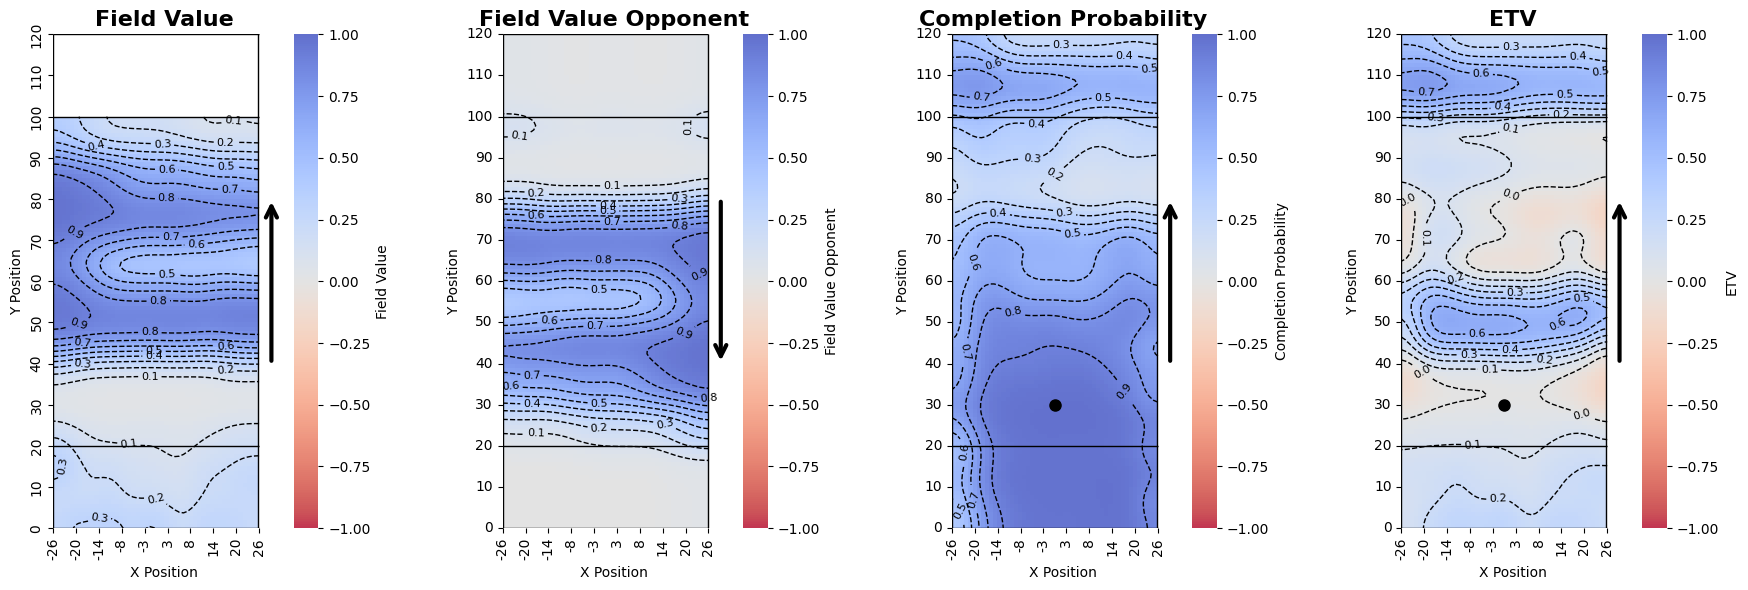

In [8]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':0.001}
sigma = 4
thrower_x, thrower_y = 25, 30
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

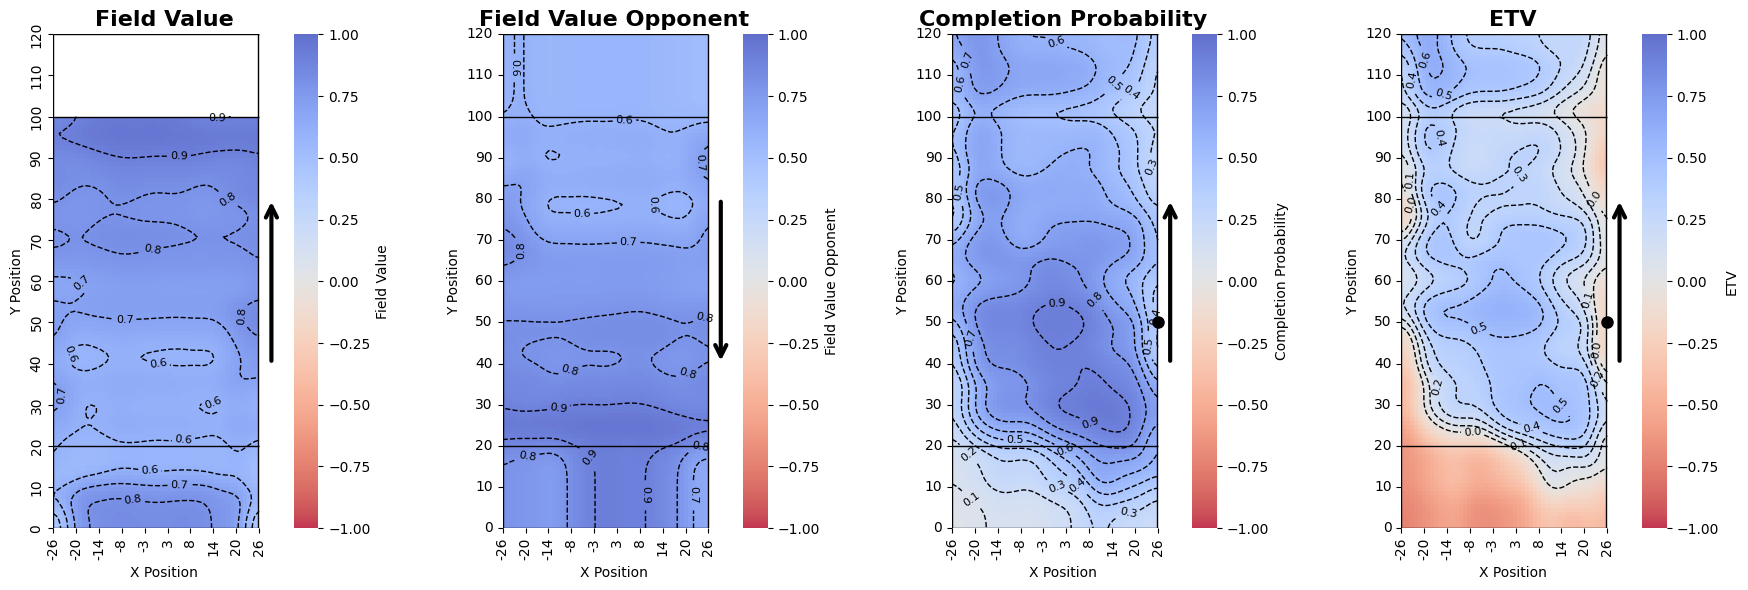

In [5]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':10}
sigma = 3
thrower_x, thrower_y = 50, 50
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

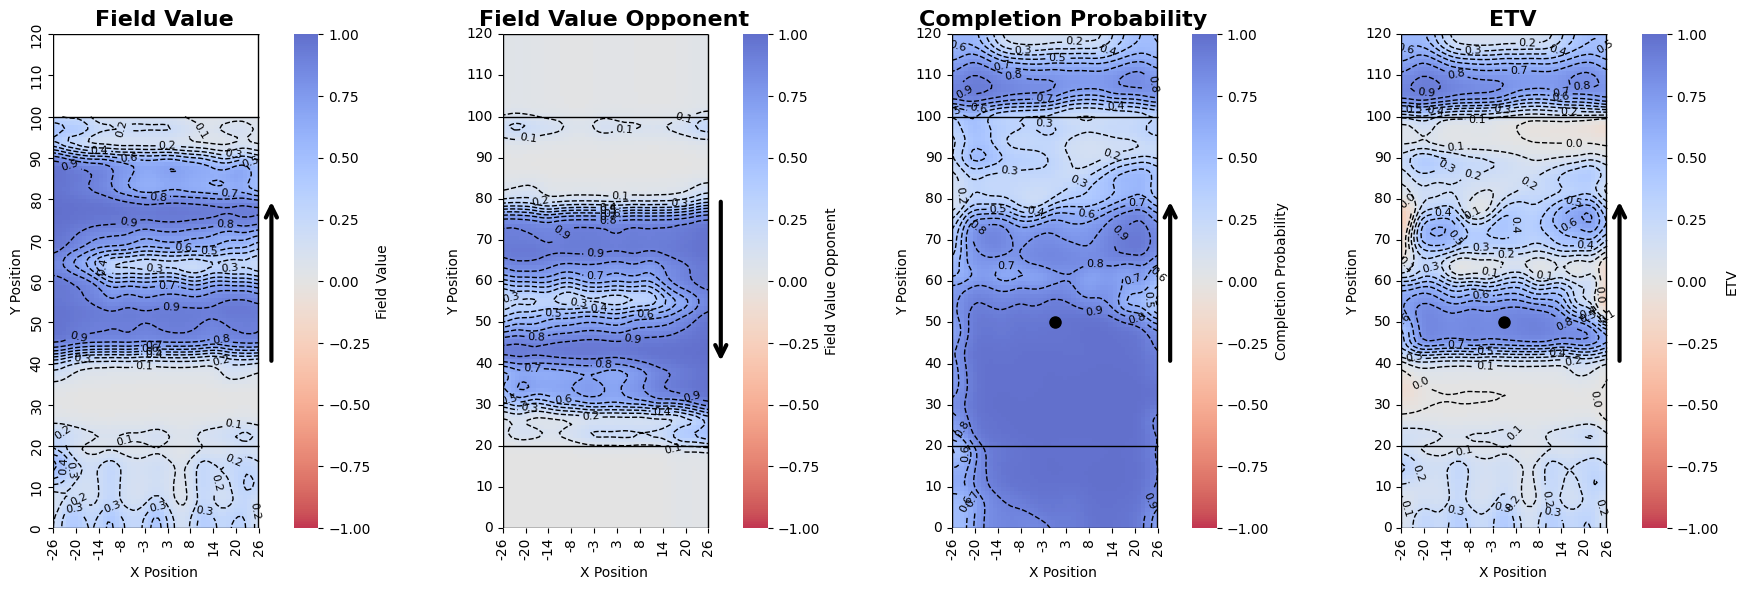

In [6]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':0.0001}
sigma = 2
thrower_x, thrower_y = 25, 50
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

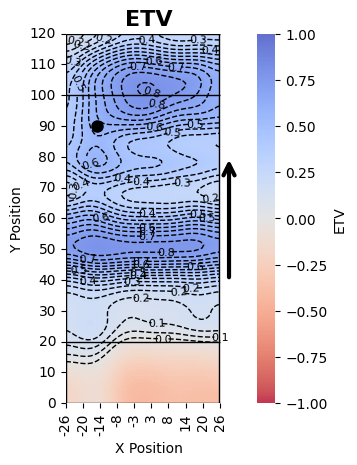

In [7]:
defaults = {'possession_num':1, 'possession_throw':4,'game_quarter':4, 'quarter_point':1,'score_diff':0,'times':0.01}
sigma = 5
thrower_x, thrower_y = 10, 90
cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)
etv = models['etv_model'].predict(cp_grid).reshape(120,50)
_ = plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, highlight_point=(thrower_x, thrower_y), contour_every=0.05)